In [13]:
import random, time, os, sys, json
from tqdm import tqdm

In [14]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
'''
{2: [2],
 4: [2, 4],
 8: [2, 8],
 16: [2, 4, 16],
 32: [2, 32],
 64: [2, 4, 8, 64],
 128: [2, 128],
 256: [2, 4, 16, 256],
 512: [2, 8, 512],
 1024: [2, 4, 32, 1024],
 2048: [2, 2048],
 4096: [2, 4, 8, 16, 64, 4096],
 8192: [2, 8192],
 16384: [2, 4, 128, 16384]}
 '''

In [95]:
mlp_dims_scale = {
    32: [2, 4, 8],
    4: [4, 8, 16],
    2: [4, 8, 16],
}
pwlf_grid_size = [3, 5, 9]

SEEDS = [147, 258, 369]
EPOCHS = 50

bench_dict = {}
def load_json(model_name):
#     data = {}
    with open(f'./models/stats/{model_name}_stats.json') as f:
        data = json.load(f)
    bench_dict[model_name] = data
    return

def load_benchmark_fmnist():
    for seed in SEEDS:
        ## First test MLP with allowed dimension mixing
        for dim, hid_dim in mlp_dims_scale.items(): ## For 1024 these are the factors
            for hr in hid_dim:
                model_name = f"fmnist_BlockMLP_b{dim}_h{hr}_s{seed}"
                load_json(model_name)

            model_name = f"fmnist_SparseMLP_b{dim}_s{seed}"
            load_json(model_name)
            
            model_name = f"fmnist_SparseMLP_PWLF_b{dim}_s{seed}"
            load_json(model_name)
        
        for gsz in pwlf_grid_size:
            model_name = f"fmnist_PairPWLF_g{gsz}_s{seed}"
            load_json(model_name)
        
        model_name = f"fmnist_OrdinaryMLP_s{seed}"
        load_json(model_name)

In [96]:
load_benchmark_fmnist()

In [97]:
bench_dict

{'fmnist_BlockMLP_b32_h2_s147': {'num_param': 280586,
  'latency': {'mean': 0.0004097371339797974, 'std': 3.5632121231766454e-05},
  'train_acc': [84.25666666666666,
   88.805,
   90.33,
   91.51333333333334,
   92.64666666666666,
   93.32833333333333,
   94.00666666666666,
   94.82333333333334,
   95.32666666666667,
   95.97,
   96.50166666666667,
   96.85333333333334,
   97.23333333333333,
   97.515,
   97.92833333333333,
   98.09,
   98.39333333333333,
   98.62666666666667,
   98.84166666666667,
   99.09833333333333,
   99.20166666666667,
   99.33666666666667,
   99.46833333333333,
   99.54833333333333,
   99.56166666666667,
   99.73166666666667,
   99.725,
   99.835,
   99.92833333333333,
   99.90666666666667,
   99.96666666666667,
   99.905,
   99.985,
   99.97666666666667,
   99.995,
   100.0,
   100.0,
   99.98666666666666,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0],
  'train_loss': [0.4429298896652957,

In [98]:
list(bench_dict.keys())

['fmnist_BlockMLP_b32_h2_s147',
 'fmnist_BlockMLP_b32_h4_s147',
 'fmnist_BlockMLP_b32_h8_s147',
 'fmnist_SparseMLP_b32_s147',
 'fmnist_SparseMLP_PWLF_b32_s147',
 'fmnist_BlockMLP_b4_h4_s147',
 'fmnist_BlockMLP_b4_h8_s147',
 'fmnist_BlockMLP_b4_h16_s147',
 'fmnist_SparseMLP_b4_s147',
 'fmnist_SparseMLP_PWLF_b4_s147',
 'fmnist_BlockMLP_b2_h4_s147',
 'fmnist_BlockMLP_b2_h8_s147',
 'fmnist_BlockMLP_b2_h16_s147',
 'fmnist_SparseMLP_b2_s147',
 'fmnist_SparseMLP_PWLF_b2_s147',
 'fmnist_PairPWLF_g3_s147',
 'fmnist_PairPWLF_g5_s147',
 'fmnist_PairPWLF_g9_s147',
 'fmnist_OrdinaryMLP_s147',
 'fmnist_BlockMLP_b32_h2_s258',
 'fmnist_BlockMLP_b32_h4_s258',
 'fmnist_BlockMLP_b32_h8_s258',
 'fmnist_SparseMLP_b32_s258',
 'fmnist_SparseMLP_PWLF_b32_s258',
 'fmnist_BlockMLP_b4_h4_s258',
 'fmnist_BlockMLP_b4_h8_s258',
 'fmnist_BlockMLP_b4_h16_s258',
 'fmnist_SparseMLP_b4_s258',
 'fmnist_SparseMLP_PWLF_b4_s258',
 'fmnist_BlockMLP_b2_h4_s258',
 'fmnist_BlockMLP_b2_h8_s258',
 'fmnist_BlockMLP_b2_h16_s258',
 

## Filter out the best test acc ones

In [99]:
for k, v in bench_dict.items():
    print(k, max(v['test_acc']))

fmnist_BlockMLP_b32_h2_s147 89.57
fmnist_BlockMLP_b32_h4_s147 89.64
fmnist_BlockMLP_b32_h8_s147 90.22
fmnist_SparseMLP_b32_s147 89.5
fmnist_SparseMLP_PWLF_b32_s147 89.45
fmnist_BlockMLP_b4_h4_s147 88.95
fmnist_BlockMLP_b4_h8_s147 89.76
fmnist_BlockMLP_b4_h16_s147 90.07
fmnist_SparseMLP_b4_s147 89.66
fmnist_SparseMLP_PWLF_b4_s147 88.81
fmnist_BlockMLP_b2_h4_s147 88.86
fmnist_BlockMLP_b2_h8_s147 89.42
fmnist_BlockMLP_b2_h16_s147 89.67
fmnist_SparseMLP_b2_s147 89.13
fmnist_SparseMLP_PWLF_b2_s147 89.05
fmnist_PairPWLF_g3_s147 88.13
fmnist_PairPWLF_g5_s147 88.55
fmnist_PairPWLF_g9_s147 87.71
fmnist_OrdinaryMLP_s147 90.28
fmnist_BlockMLP_b32_h2_s258 89.25
fmnist_BlockMLP_b32_h4_s258 89.6
fmnist_BlockMLP_b32_h8_s258 90.03
fmnist_SparseMLP_b32_s258 89.74
fmnist_SparseMLP_PWLF_b32_s258 89.68
fmnist_BlockMLP_b4_h4_s258 89.16
fmnist_BlockMLP_b4_h8_s258 89.59
fmnist_BlockMLP_b4_h16_s258 89.9
fmnist_SparseMLP_b4_s258 89.39
fmnist_SparseMLP_PWLF_b4_s258 88.85
fmnist_BlockMLP_b2_h4_s258 89.47
fmnist_

In [100]:
best_bench = dict()
for k, v in bench_dict.items():
    print(k)
    k = k[:-5]
    if k not in best_bench:
        print("initialize")
        best_bench[k] = v
        print(f'best acc {max(v["test_acc"])}')
    else:
        ## check if this one has higher test acc
        if max(v['test_acc']) > max(best_bench[k]['test_acc']):
            best_bench[k] = v
            print(f'better acc {max(v["test_acc"])}')
        else:
            print(f'worse acc {max(v["test_acc"])}')

    print()

fmnist_BlockMLP_b32_h2_s147
initialize
best acc 89.57

fmnist_BlockMLP_b32_h4_s147
initialize
best acc 89.64

fmnist_BlockMLP_b32_h8_s147
initialize
best acc 90.22

fmnist_SparseMLP_b32_s147
initialize
best acc 89.5

fmnist_SparseMLP_PWLF_b32_s147
initialize
best acc 89.45

fmnist_BlockMLP_b4_h4_s147
initialize
best acc 88.95

fmnist_BlockMLP_b4_h8_s147
initialize
best acc 89.76

fmnist_BlockMLP_b4_h16_s147
initialize
best acc 90.07

fmnist_SparseMLP_b4_s147
initialize
best acc 89.66

fmnist_SparseMLP_PWLF_b4_s147
initialize
best acc 88.81

fmnist_BlockMLP_b2_h4_s147
initialize
best acc 88.86

fmnist_BlockMLP_b2_h8_s147
initialize
best acc 89.42

fmnist_BlockMLP_b2_h16_s147
initialize
best acc 89.67

fmnist_SparseMLP_b2_s147
initialize
best acc 89.13

fmnist_SparseMLP_PWLF_b2_s147
initialize
best acc 89.05

fmnist_PairPWLF_g3_s147
initialize
best acc 88.13

fmnist_PairPWLF_g5_s147
initialize
best acc 88.55

fmnist_PairPWLF_g9_s147
initialize
best acc 87.71

fmnist_OrdinaryMLP_s147
init

In [101]:
best_bench

{'fmnist_BlockMLP_b32_h2': {'num_param': 280586,
  'latency': {'mean': 0.0004097371339797974, 'std': 3.5632121231766454e-05},
  'train_acc': [84.25666666666666,
   88.805,
   90.33,
   91.51333333333334,
   92.64666666666666,
   93.32833333333333,
   94.00666666666666,
   94.82333333333334,
   95.32666666666667,
   95.97,
   96.50166666666667,
   96.85333333333334,
   97.23333333333333,
   97.515,
   97.92833333333333,
   98.09,
   98.39333333333333,
   98.62666666666667,
   98.84166666666667,
   99.09833333333333,
   99.20166666666667,
   99.33666666666667,
   99.46833333333333,
   99.54833333333333,
   99.56166666666667,
   99.73166666666667,
   99.725,
   99.835,
   99.92833333333333,
   99.90666666666667,
   99.96666666666667,
   99.905,
   99.985,
   99.97666666666667,
   99.995,
   100.0,
   100.0,
   99.98666666666666,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0],
  'train_loss': [0.4429298896652957,
   0

## Plot training curve

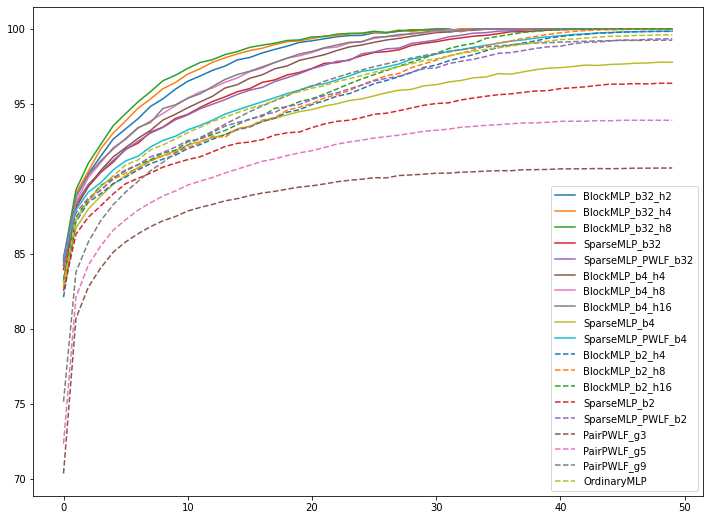

In [102]:
plt.figure(figsize=(12, 9))
for i, (model_name, stat) in enumerate(best_bench.items()):
    if i >= 10:
        linestyle='dashed'
    else:
        linestyle = None
    plt.plot(stat["train_acc"], label=model_name[7:], linestyle=linestyle)
plt.legend()

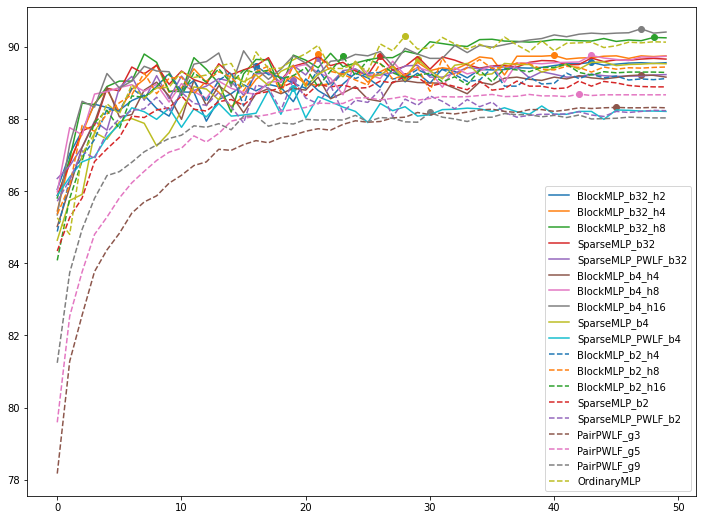

In [103]:
plt.figure(figsize=(12, 9))
for i, (model_name, stat) in enumerate(best_bench.items()):
    if i >= 10:
        linestyle='dashed'
    else:
        linestyle = None
    acc = stat["test_acc"]
    plt.plot(acc, label=model_name[7:], linestyle=linestyle)
    plt.scatter(np.argmax(acc), np.max(acc))
plt.legend()

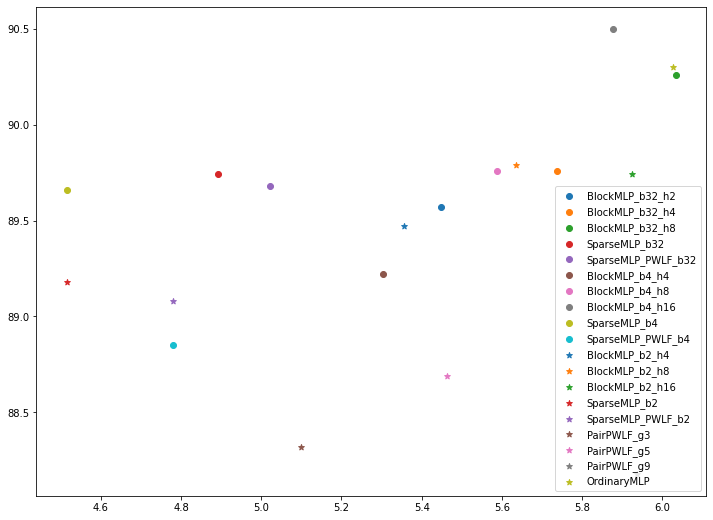

In [104]:
plt.figure(figsize=(12, 9))
for i, (model_name, stat) in enumerate(best_bench.items()):
    if i//10 == 0:
        marker='o'
    elif i//10 == 1:
        marker='*'
    elif i//10 == 2:
        marker='+'
    else:
        marker = '_'

    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
#     acc = np.max(stat["train_acc"])
    plt.scatter(n_params, acc, label=model_name[7:], marker=marker)
plt.legend()

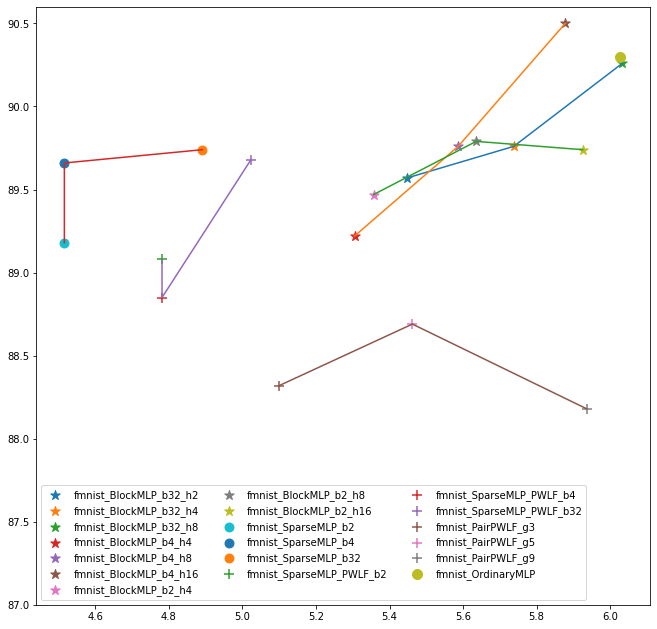

In [117]:
plt.figure(figsize=(11, 11))

## first plot the BlockMLP32
xs, ys = [], [] 
for h in [2, 4, 8]:
    model = 'fmnist_BlockMLP_b32'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='*', s=100)
    
plt.plot(xs, ys)

### Plot for Block 4
xs, ys = [], [] 
for h in [4, 8, 16]:
    model = 'fmnist_BlockMLP_b4'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='*', s=100)
    
plt.plot(xs, ys)

### Plot for Block 2
xs, ys = [], [] 
for h in [4, 8, 16]:
    model = 'fmnist_BlockMLP_b2'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='*', s=100)
    
plt.plot(xs, ys)

### Plot for sparse Weights
xs, ys = [], [] 
for b in [2, 4, 32]:
    model = f'fmnist_SparseMLP_b{b}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='o', s=80)
    
plt.plot(xs, ys)

### Plot for sparse Weights + PWLF (b5)
xs, ys = [], [] 
for b in [2, 4, 32]:
    model = f'fmnist_SparseMLP_PWLF_b{b}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='+', s=100)
    
plt.plot(xs, ys)

### Plot for PWLF grids
xs, ys = [], [] 
for b in [3, 5, 9]:
    model = f'fmnist_PairPWLF_g{b}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='+', s=100)
    
plt.plot(xs, ys)

### For Ordinary MLP
model = f'fmnist_OrdinaryMLP'
stat = best_bench[model]

n_params = stat['num_param']
n_params = np.log10(n_params)

acc = np.max(stat["test_acc"])
xs += [n_params]
ys += [acc]
plt.scatter(n_params, acc, label=model, marker='o', s=100)

plt.ylim((87, 90.6))
plt.legend(loc=3, ncol=3)

In [94]:
list(best_bench.keys())

['fmnist_BlockMLP_b32_h2',
 'fmnist_BlockMLP_b32_h4',
 'fmnist_BlockMLP_b32_h8',
 'fmnist_SparseMLP_b32',
 'fmnist_BlockMLP_b4_h4',
 'fmnist_BlockMLP_b4_h8',
 'fmnist_BlockMLP_b4_h16',
 'fmnist_SparseMLP_b4',
 'fmnist_BlockMLP_b2_h4',
 'fmnist_BlockMLP_b2_h8',
 'fmnist_BlockMLP_b2_h16',
 'fmnist_SparseMLP_b2',
 'fmnist_PairPWLF_g3',
 'fmnist_PairPWLF_g5',
 'fmnist_PairPWLF_g9',
 'fmnist_OrdinaryMLP']